# Requirements

In [1]:
!pip install catboost


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Data Loading and Transformations

In [3]:
#reading the data from from excel file into a data frame and printing it

df = pd.read_excel('Baseball_Dataset.xlsx')
df.head(2)

,Game Code,Game,SEC,Year,Day,Date,Game Time,MSU Win?,Box Office Total,Actual Scan Total,Revenue,Price Per Ticket,% used of tickets out,Weather,Temperature in F
0,B1401,Western Carolina,No,2014,Friday,2014-02-14,18:30:00,Lost,6455,2663,14325.0,5,0.412548,Rainy,48
1,B1402,Western Carolina,No,2014,Saturday,2014-02-15,16:00:00,Won,7282,4821,18040.0,4,0.662043,Sunny,45


In [4]:
#gives no.of rows, no.of columns

df.shape

(266, 15)

In [5]:
#info() gives the datatype of each column and the count of non-null values in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Game Code              266 non-null    object        
 1   Game                   266 non-null    object        
 2   SEC                    266 non-null    object        
 3   Year                   266 non-null    int64         
 4   Day                    266 non-null    object        
 5   Date                   266 non-null    datetime64[ns]
 6   Game Time              266 non-null    object        
 7   MSU Win?               266 non-null    object        
 8   Box Office Total       266 non-null    int64         
 9   Actual Scan Total      266 non-null    int64         
 10  Revenue                266 non-null    float64       
 11  Price Per Ticket       266 non-null    int64         
 12  % used of tickets out  266 non-null    float64       
 13  Weath

In [6]:
#describe() give the overall stats of the dataset 

df.describe()

,Year,Box Office Total,Actual Scan Total,Revenue,Price Per Ticket,% used of tickets out,Temperature in F
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,2018.691729,10294.101504,3962.007519,54997.407707,15.500000,0.393966,65.860902
std,3.469937,4404.183707,2619.092198,40934.402441,9.649812,0.212493,12.354489
min,2014.000000,4294.000000,281.000000,4160.000000,1.000000,0.049126,30.000000
25%,2016.000000,6528.750000,2035.250000,22291.000000,9.250000,0.219301,60.000000
50%,2018.000000,7947.000000,3395.500000,40062.865000,14.000000,0.359952,70.000000
75%,2022.000000,15077.750000,5354.250000,79495.400000,19.000000,0.542435,75.000000
max,2024.000000,19997.000000,16891.000000,256307.000000,70.000000,0.986427,90.000000


In [7]:
#to get the correlations between numerical columns

df.corr()

C:\Users\megha\AppData\Local\Temp\ipykernel_24760\448477274.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Box Office Total,Actual Scan Total,Revenue,Price Per Ticket,% used of tickets out,Temperature in F
Year,1.000000,0.859621,0.247753,0.438504,0.099512,-0.261516,0.152952
Box Office Total,0.859621,1.000000,0.490488,0.615852,0.120194,-0.100302,0.187444
Actual Scan Total,0.247753,0.490488,1.000000,0.746304,-0.252016,0.764648,0.257130
Revenue,0.438504,0.615852,0.746304,1.000000,0.274193,0.391420,0.315895
Price Per Ticket,0.099512,0.120194,-0.252016,0.274193,1.000000,-0.432774,-0.027079
% used of tickets out,-0.261516,-0.100302,0.764648,0.391420,-0.432774,1.000000,0.276983
Temperature in F,0.152952,0.187444,0.257130,0.315895,-0.027079,0.276983,1.000000


In [8]:
#unique() gives the count of unique values in each column

df.nunique()

Game Code                266
Game                     155
SEC                        2
Year                       9
Day                        9
Date                     266
Game Time                 23
MSU Win?                   2
Box Office Total         259
Actual Scan Total        264
Revenue                  264
Price Per Ticket          43
% used of tickets out    266
Weather                    4
Temperature in F          34
dtype: int64

In [9]:
df.columns

Index(['Game Code', 'Game', 'SEC', 'Year', 'Day', 'Date', 'Game Time',
       'MSU Win?', 'Box Office Total', 'Actual Scan Total', 'Revenue',
       'Price Per Ticket', '% used of tickets out', 'Weather',
       'Temperature in F'],
      dtype='object')

In [79]:
#we can count the number of values of each category in a column

df['SEC'].value_counts()

No     138
Yes    128
Name: SEC, dtype: int64

In [80]:
df['SEC'] = df['SEC'].map({"Yes":1, "No":0})

df['SEC'].value_counts()

0    138
1    128
Name: SEC, dtype: int64

In [81]:
df['Day'].value_counts()

Friday       68
Saturday     66
Tuesday      38
Sunday       33
Wednesday    20
Sunday       18
Thursday     17
Tuesday       5
Monday        1
Name: Day, dtype: int64

In [82]:
df['Day'].value_counts().index

#because of the empty space for the same days

Index(['Friday', 'Saturday', 'Tuesday', 'Sunday', 'Wednesday', 'Sunday ',
       'Thursday', 'Tuesday ', 'Monday'],
      dtype='object')

In [83]:
df['Day'] = df['Day'].str.strip()

df['Day'].value_counts()

Friday       68
Saturday     66
Sunday       51
Tuesday      43
Wednesday    20
Thursday     17
Monday        1
Name: Day, dtype: int64

In [19]:
df.groupby('SEC')['% used of tickets out'].mean()

SEC
0    0.289265
1    0.506847
Name: % used of tickets out, dtype: float64

# Including Weather

In [143]:
# both inputs and ouput should be a list

def MLmodel(inputs, output, model):
    
    X = df[inputs]
    y = df[output]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
        
    model.fit(X_train, y_train, cat_features=categorical_features, verbose=100)
    
    return model, X_train, X_test, y_train, y_test
    

In [144]:
# Define inputs and output from the DataFrame

inputs = ['Game', 'SEC', 'Day', 'Weather']
output = ['% used of tickets out']

model = CatBoostRegressor(random_seed=42, logging_level='Verbose', learning_rate=0.01)

trained_model, X_train, X_test, y_train, y_test = MLmodel(inputs, output, model)


0:	learn: 0.2137576	total: 1.24ms	remaining: 1.24s
100:	learn: 0.1673068	total: 63.4ms	remaining: 564ms
200:	learn: 0.1477541	total: 106ms	remaining: 423ms
300:	learn: 0.1367629	total: 148ms	remaining: 344ms
400:	learn: 0.1307754	total: 190ms	remaining: 284ms
500:	learn: 0.1262095	total: 232ms	remaining: 231ms
600:	learn: 0.1226081	total: 277ms	remaining: 184ms
700:	learn: 0.1194197	total: 317ms	remaining: 135ms
800:	learn: 0.1166835	total: 360ms	remaining: 89.5ms
900:	learn: 0.1134619	total: 406ms	remaining: 44.6ms
999:	learn: 0.1103785	total: 456ms	remaining: 0us


In [145]:
y_pred_train = trained_model.predict(X_train)

print('training rmse : ', mean_squared_error(y_train, y_pred_train))

y_pred_test = trained_model.predict(X_test)

print('testing rmse : ', mean_squared_error(y_test, y_pred_test))


training rmse :  0.014542622244502805
testing rmse :  0.022236523347531963


Game: 26.093843479162793
SEC: 23.222758583264003
Day: 31.77901711457397
Weather: 18.904380822999226


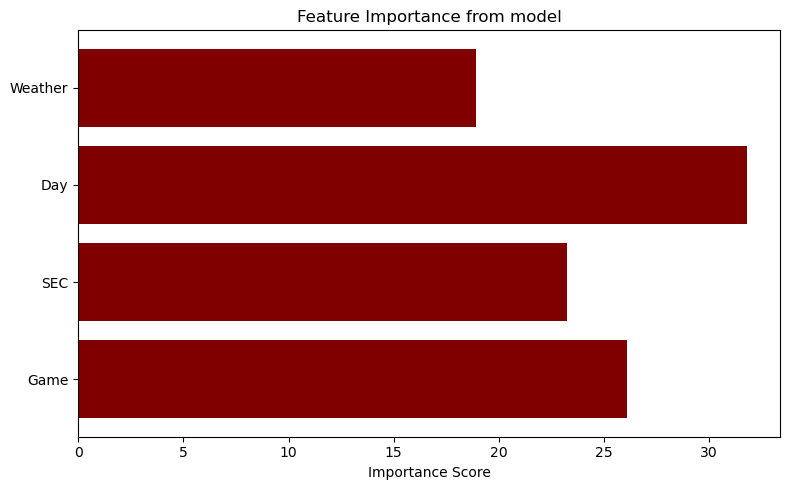

In [146]:
feature_importance = trained_model.get_feature_importance()

for feature, importance in zip(X_train.columns, feature_importance):
    print(f'{feature}: {importance}')
    
features = X_train.columns.tolist()
importance_scores = feature_importance.tolist()

plt.figure(figsize=(8, 5))
plt.barh(features, importance_scores, color='maroon')
plt.xlabel('Importance Score')
plt.title('Feature Importance from model')

plt.tight_layout()
plt.show()

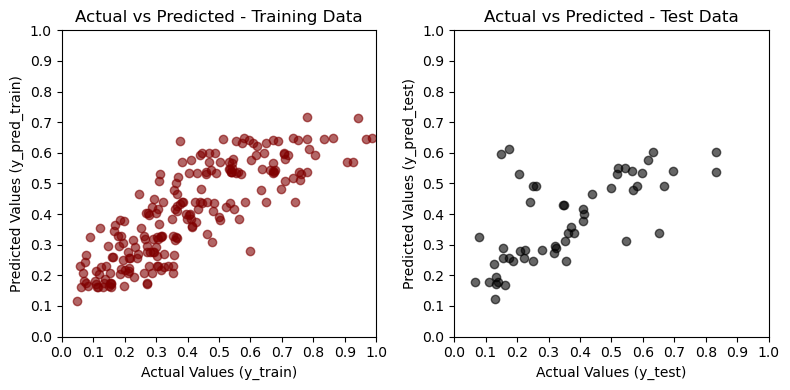

In [147]:

plt.figure(figsize=(8, 4))

# First graph: y_train vs y_pred_train
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='maroon', alpha=0.6)
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_pred_train)')
plt.title('Actual vs Predicted - Training Data')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

# Second graph: y_test vs y_pred_test
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='black', alpha=0.6)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred_test)')
plt.title('Actual vs Predicted - Test Data')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

# Display both plots
plt.tight_layout()
plt.show()


In [148]:
# dowloading the model as a pickle file
with open('BbP_model_w.pkl', 'wb') as file:
    pickle.dump(trained_model, file)
    
# loading the pickle file
with open('BbP_model_w.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
# making predictions using the pickle file
z = X_test.iloc[0]
print(z)
print('-----------------------------')
print('predcited value for this row :', loaded_model.predict(z))

Game       Grambling
SEC                0
Day          Tuesday
Weather       Cloudy
Name: 181, dtype: object
-----------------------------
predcited value for this row : 0.1677708810917673


# Without weather

In [137]:
# both inputs and ouput should be a list

def MLmodel(inputs, output, model):
    
    X = df[inputs] 
    y = df[output]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
        
    model.fit(X_train, y_train, cat_features=categorical_features, verbose=100)
    
    return model, X_train, X_test, y_train, y_test
    

In [138]:
# Define inputs and output from the DataFrame

inputs = ['Game', 'SEC', 'Day']
output = ['% used of tickets out']

model = CatBoostRegressor(random_seed=42, logging_level='Verbose', learning_rate=0.05)

trained_model, X_train, X_test, y_train, y_test = MLmodel(inputs, output, model)

0:	learn: 0.2105695	total: 2.33ms	remaining: 2.32s
100:	learn: 0.1354085	total: 50.5ms	remaining: 450ms
200:	learn: 0.1222533	total: 86.8ms	remaining: 345ms
300:	learn: 0.1138612	total: 126ms	remaining: 292ms
400:	learn: 0.1066362	total: 166ms	remaining: 249ms
500:	learn: 0.1011822	total: 203ms	remaining: 202ms
600:	learn: 0.0965532	total: 241ms	remaining: 160ms
700:	learn: 0.0929357	total: 277ms	remaining: 118ms
800:	learn: 0.0902743	total: 314ms	remaining: 78.1ms
900:	learn: 0.0876888	total: 351ms	remaining: 38.5ms
999:	learn: 0.0856604	total: 387ms	remaining: 0us


In [139]:
y_pred_train = trained_model.predict(X_train)

print('training rmse : ', mean_squared_error(y_train, y_pred_train))

y_pred_test = trained_model.predict(X_test)

print('testing rmse : ', mean_squared_error(y_test, y_pred_test))


training rmse :  0.018240276844051044
testing rmse :  0.024023095617016193


Game: 33.086914415164244
SEC: 26.236224138298205
Day: 40.67686144653754


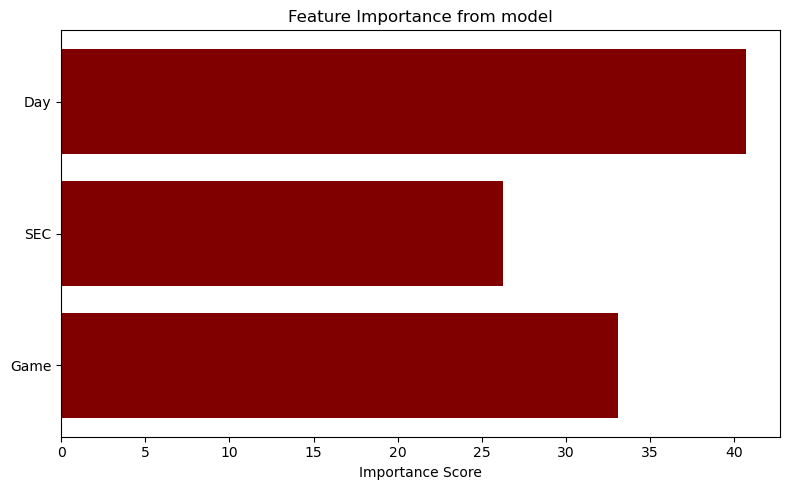

In [140]:
feature_importance = trained_model.get_feature_importance()

for feature, importance in zip(X_train.columns, feature_importance):
    print(f'{feature}: {importance}')
    
features = X_train.columns.tolist()
importance_scores = feature_importance.tolist()

plt.figure(figsize=(8, 5))
plt.barh(features, importance_scores, color='maroon')
plt.xlabel('Importance Score')
plt.title('Feature Importance from model')

plt.tight_layout()
plt.show()

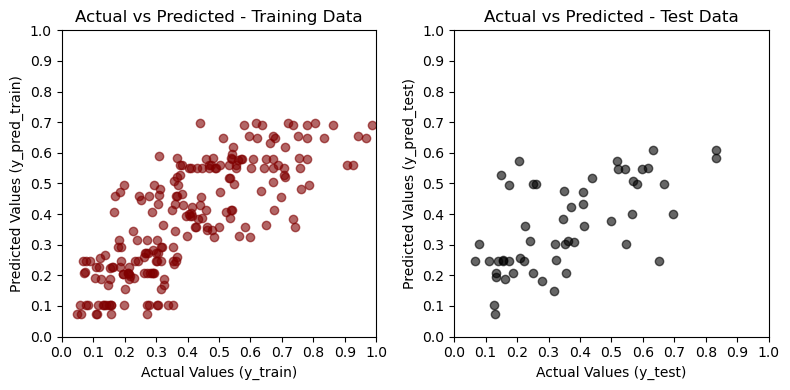

In [141]:

plt.figure(figsize=(8, 4))

# First graph: y_train vs y_pred_train
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='maroon', alpha=0.6)
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_pred_train)')
plt.title('Actual vs Predicted - Training Data')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

# Second graph: y_test vs y_pred_test
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='black', alpha=0.6)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred_test)')
plt.title('Actual vs Predicted - Test Data')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

# Display both plots
plt.tight_layout()
plt.show()


In [142]:
# dowloading the model as a pickle file
with open('BbP_model.pkl', 'wb') as file:
    pickle.dump(trained_model, file)
    
# loading the pickle file
with open('BbP_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
# making predictions using the pickle file
z = X_test.iloc[0]
print(z)
print('-----------------------------')
print('predcited value for this row :', loaded_model.predict(z))

Game    Grambling
SEC             0
Day       Tuesday
Name: 181, dtype: object
-----------------------------
predcited value for this row : 0.18761276210248737


# Additional code